In [1]:
import numpy as np
import cv2 as cv
import random
from skimage.feature import (corner_harris, corner_subpix, corner_peaks, plot_matches)
from skimage  import transform
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr, linregress
from scipy.spatial import distance, distance_matrix
import time
import math

Text(0.5, 1.0, 'hist2')

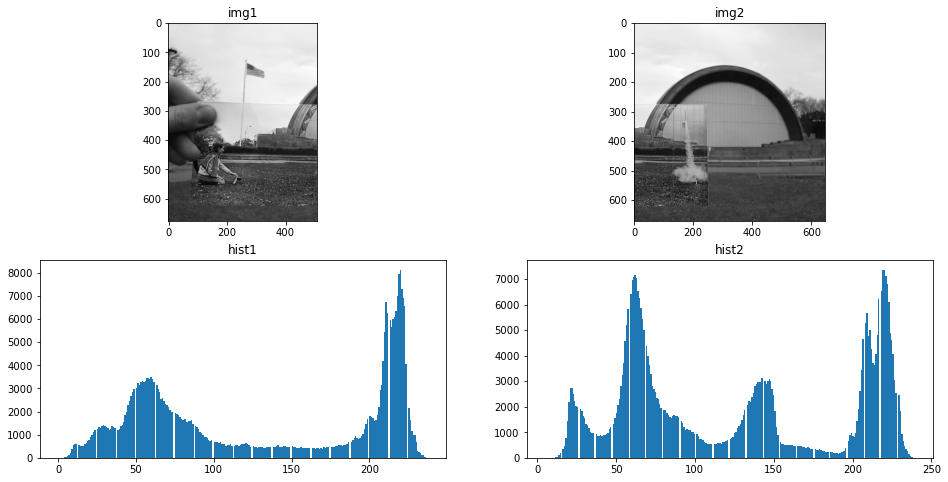

In [2]:
img1= cv.imread("left.png") ###reading each image
img2= cv.imread("right.png")

img1color=cv.imread("left.png")
img2color=cv.imread("right.png")
img1colorRGB=cv.cvtColor(img1color,cv.COLOR_BGR2RGB) ###keeping each image in color format for the stitching later
img2colorRGB=cv.cvtColor(img2color,cv.COLOR_BGR2RGB)

img1= cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
img2= cv.cvtColor(img2,cv.COLOR_BGR2GRAY)

plt.figure(figsize = (16,8))
plt.subplot(2, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('img1')

plt.subplot(2, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('img2')

plt.subplot(2, 2, 3)
plt.hist(img1.ravel(), bins=256)     ###showing the histograms for the gray images
plt.title('hist1')

plt.subplot(2, 2, 4)
plt.hist(img2.ravel(), bins=256)
plt.title('hist2')

Text(0.5, 1.0, 'equ2')

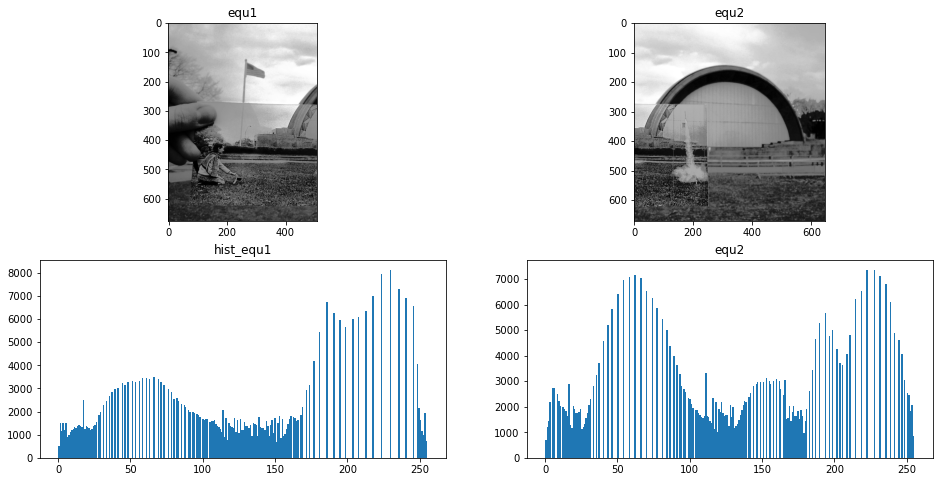

In [3]:
equ1 = cv.equalizeHist(img1) ###equalizing the histograms to obtain a better view of the image contrast
equ2 = cv.equalizeHist(img2)

plt.figure(figsize = (16,8))

plt.subplot(2, 2, 1)
plt.imshow(equ1, cmap='gray')
plt.title('equ1')

plt.subplot(2, 2, 2)
plt.imshow(equ2, cmap='gray')
plt.title('equ2')

plt.subplot(2, 2, 3)
plt.hist(equ1.ravel(), bins=256)
plt.title('hist_equ1')

plt.subplot(2, 2, 4)
plt.hist(equ2.ravel(), bins=256)
plt.title('equ2')

Text(0.5, 1.0, 'corner_harris2')

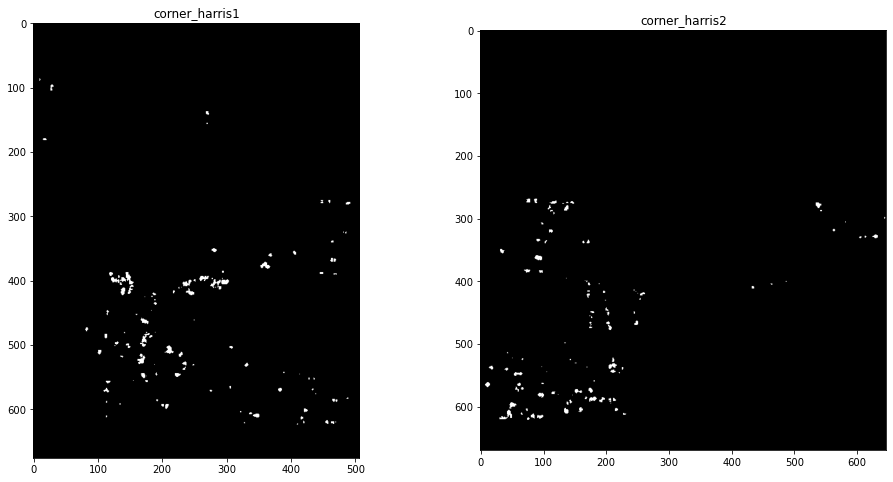

In [4]:
thresh=0.05     ###parameter to change
blocksize=5     ###parameter to change
ksize=9         ###parameter to change
k=0.05          ###parameter to change

corner_harris1 = cv.cornerHarris(img1,blocksize,ksize,k) 
corner_harris2 = cv.cornerHarris(img2,blocksize,ksize,k) 

corner_harris1=np.where(corner_harris1>thresh*corner_harris1.max(),255,0)
corner_harris2=np.where(corner_harris2>thresh*corner_harris2.max(),255,0)

plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
plt.imshow(corner_harris1, cmap='gray')
plt.title('corner_harris1')


plt.subplot(1, 2, 2)
plt.imshow(corner_harris2, cmap='gray')
plt.title('corner_harris2')

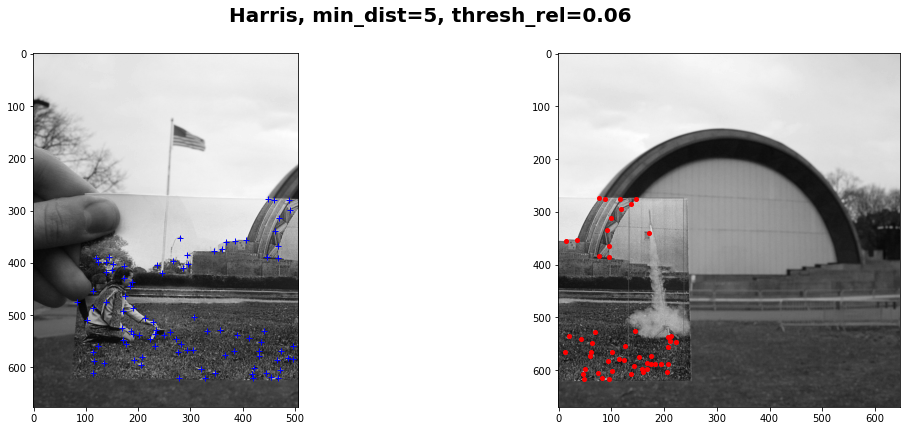

In [5]:
thresh=0.2           ###parameter to change
blocksize=5          ###parameter to change
ksize=5              ###parameter to change
k=0.1                ###parameter to change
k=0.09               ###parameter to change
eps=1e-06            ###parameter to change
sigma=2              ###parameter to change
min_distance=5       ###parameter to change
threshold_rel=0.06   ###parameter to change

###the harris corner detection with skimage, using the parameters above. 
coords1 = corner_peaks(corner_harris(img1, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)
coords2 = corner_peaks(corner_harris(img2, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.imshow(img1, cmap=plt.cm.gray)
ax1.plot(coords1[:, 1], coords1[:, 0], color='blue', marker='+',
        linestyle='None', markersize=6)
fig.suptitle(f'Harris, min_dist={min_distance}, thresh_rel={threshold_rel}', fontsize=20, fontweight='bold')

ax2.imshow(img2, cmap=plt.cm.gray)
ax2.plot(coords2[:, 1], coords2[:, 0], color='red', marker='o',
        linestyle='None', markersize=4)
fig.set_size_inches(18.5, 6.5)
plt.show()

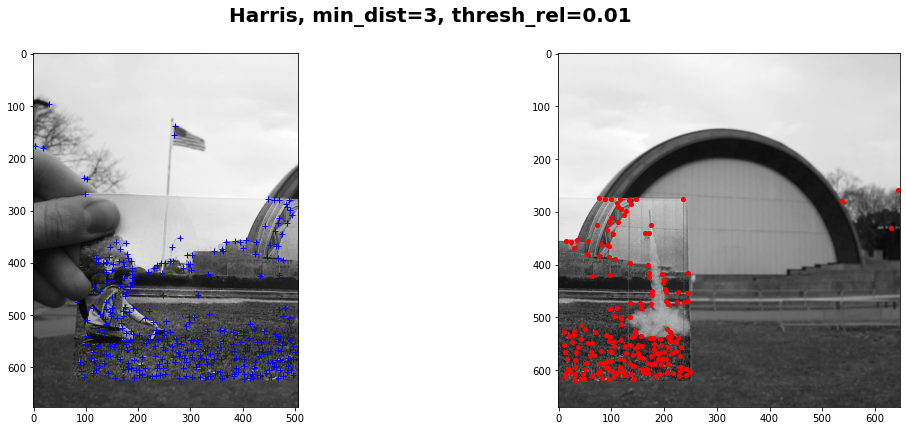

In [6]:
thresh=0.2           ###parameter to change
blocksize=5          ###parameter to change
ksize=3              ###parameter to change
k=0.1                ###parameter to change
k=0.09               ###parameter to change
eps=1e-06            ###parameter to change
sigma=2              ###parameter to change
min_distance=3       ###parameter to change
threshold_rel=0.01   ###parameter to change

coords1 = corner_peaks(corner_harris(img1, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)
coords2 = corner_peaks(corner_harris(img2, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.imshow(img1, cmap=plt.cm.gray)
ax1.plot(coords1[:, 1], coords1[:, 0], color='blue', marker='+',
        linestyle='None', markersize=6)
fig.suptitle(f'Harris, min_dist={min_distance}, thresh_rel={threshold_rel}', fontsize=20, fontweight='bold')


ax2.imshow(img2, cmap=plt.cm.gray)
ax2.plot(coords2[:, 1], coords2[:, 0], color='red', marker='o',
        linestyle='None', markersize=4)
fig.set_size_inches(18.5, 6.5)
plt.show()

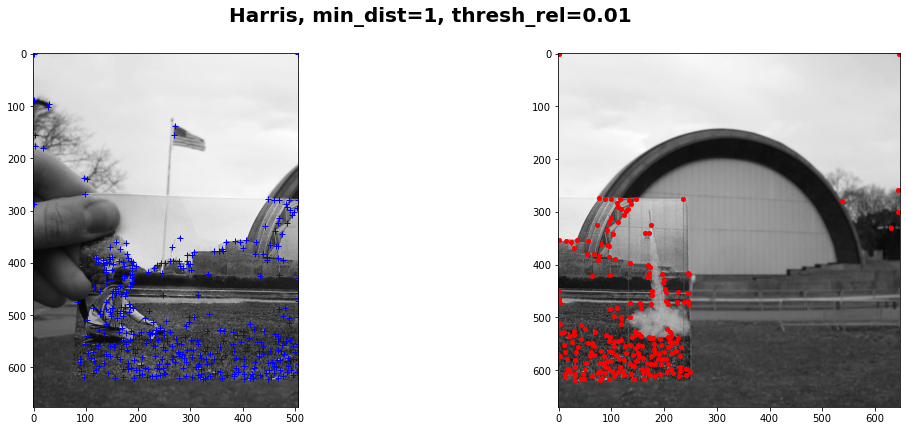

In [7]:
thresh=0.2           ###parameter to change
blocksize=5          ###parameter to change
ksize=3              ###parameter to change
k=0.1                ###parameter to change
k=0.09               ###parameter to change
eps=1e-06            ###parameter to change
sigma=2              ###parameter to change
min_distance=1       ###parameter to change
threshold_rel=0.01   ###parameter to change

coords1 = corner_peaks(corner_harris(img1, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)
coords2 = corner_peaks(corner_harris(img2, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.imshow(img1, cmap=plt.cm.gray)
ax1.plot(coords1[:, 1], coords1[:, 0], color='blue', marker='+',
        linestyle='None', markersize=6)
fig.suptitle(f'Harris, min_dist={min_distance}, thresh_rel={threshold_rel}', fontsize=20, fontweight='bold')


ax2.imshow(img2, cmap=plt.cm.gray)
ax2.plot(coords2[:, 1], coords2[:, 0], color='red', marker='o',
        linestyle='None', markersize=4)
fig.set_size_inches(18.5, 6.5)
plt.show()

Text(0.5, 1.0, 'img2 Gaussian Blur')

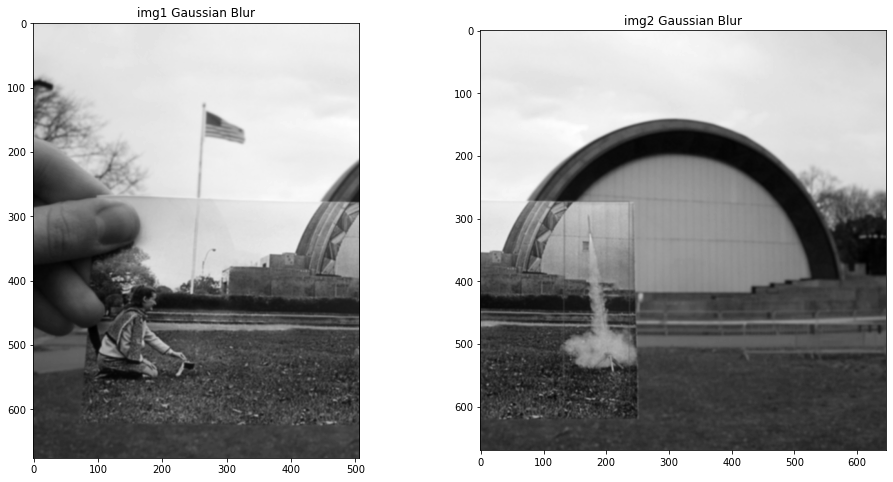

In [8]:
img1gaussblur = cv.GaussianBlur(img1,(5,5),0)
img2gaussblur = cv.GaussianBlur(img2,(5,5),0)

plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
plt.imshow(img1gaussblur, cmap='gray')
plt.title('img1 Gaussian Blur')


plt.subplot(1, 2, 2)
plt.imshow(img2gaussblur, cmap='gray')
plt.title('img2 Gaussian Blur')

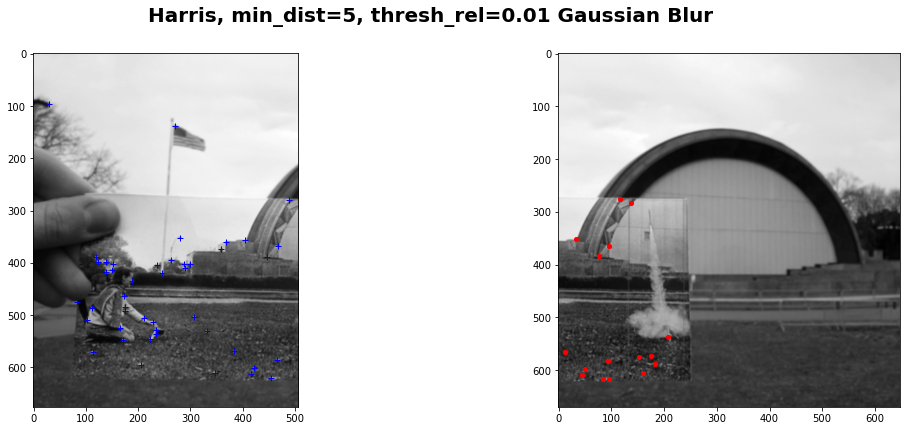

In [9]:
thresh=0.2           ###parameter to change
blocksize=5          ###parameter to change
ksize=3              ###parameter to change
k=0.1                ###parameter to change
k=0.09               ###parameter to change
eps=1e-06            ###parameter to change
sigma=2              ###parameter to change
min_distance=5       ###parameter to change
threshold_rel=0.01   ###parameter to change

coords1gaussblur = corner_peaks(corner_harris(img1gaussblur, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)
coords2gaussblur = corner_peaks(corner_harris(img2gaussblur, method='k', k=k, eps=eps, sigma=sigma), min_distance=min_distance, threshold_rel=threshold_rel)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

ax1.imshow(img1gaussblur, cmap=plt.cm.gray)
ax1.plot(coords1gaussblur[:, 1], coords1gaussblur[:, 0], color='blue', marker='+',
        linestyle='None', markersize=6)
fig.suptitle(f'Harris, min_dist={min_distance}, thresh_rel={threshold_rel} Gaussian Blur', fontsize=20, fontweight='bold')


ax2.imshow(img2gaussblur, cmap=plt.cm.gray)
ax2.plot(coords2gaussblur[:, 1], coords2gaussblur[:, 0], color='red', marker='o',
        linestyle='None', markersize=4)
fig.set_size_inches(18.5, 6.5)
plt.show()

Text(0.5, 1.0, 'Sift2')

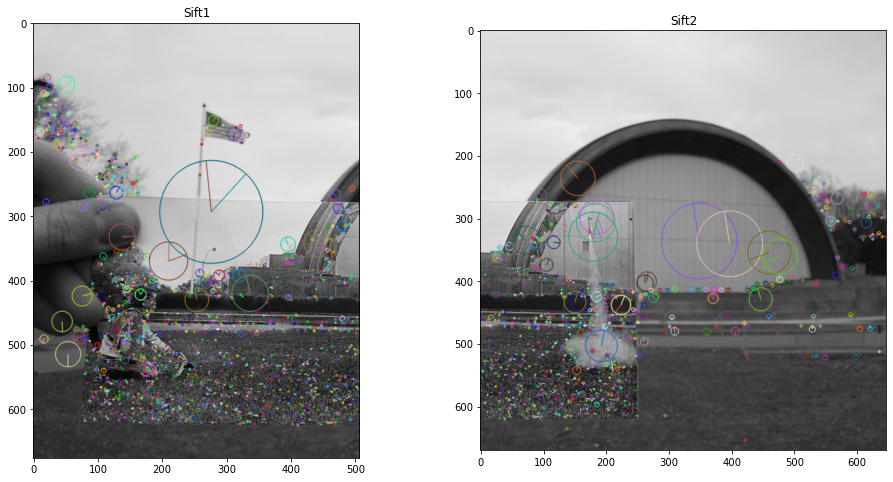

In [10]:
sift1 = cv.SIFT_create()  ###creating sift class
sift2 = cv.SIFT_create()
kp1, des1 = sift1.detectAndCompute(img1,None) ###we detect and compute the descriptors
kp2, des2 = sift2.detectAndCompute(img2,None)
pts1 = [k.pt for k in kp1]
pts2 = [k.pt for k in kp2]
pts1=np.asarray(pts1).reshape(-1,2)   ###create a numpy array-descriptors for each image
pts2=np.asarray(pts2).reshape(-1,2)
tmp1 = cv.drawKeypoints(img1, kp1, outImage = None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) ###visualize keypoints
tmp2 = cv.drawKeypoints(img2, kp2, outImage = None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize = (16,8))
plt.subplot(1, 2, 1)
plt.imshow(tmp1, cmap='gray')
plt.title('Sift1')
plt.subplot(1, 2, 2)
plt.imshow(tmp2, cmap='gray')
plt.title('Sift2')

In [11]:
max1=np.max(des1, axis=1).reshape(-1,1) 
min1=np.min(des1, axis=1).reshape(-1,1)
des1=np.where(des1==des1, (des1-min1)/(max1-min1), des1) ###normalizing each descriptor according to its maximum and minimum value (each row)

max2=np.max(des2, axis=1).reshape(-1,1) 
min2=np.min(des2, axis=1).reshape(-1,1)
des2=np.where(des2==des2, (des2-min2)/(max2-min2), des2)

start=time.time()
distances = distance_matrix(des1, des2)  ###SCIPY function: for 2 matrices n*k and m*k, produces a matrix n*m with every possible combination of distances between the 2 matrices (along the row axes)
print (distances.shape)
#print (distances)
end=time.time()
correlations=distance.cdist(des1, des2, metric='correlation') ###scipy function again
print (f"the time to execute command was: {end-start} sec")   ###usually less than 20 seconds for images 1000*1000

(1457, 831)
the time to execute command was: 2.287670373916626 sec


In [12]:
thresh_dist=0.3      ###distance parameter: if 2 descriptors have a normalized euclidean distance under this threshold, then they are a match
distances_thresh=np.where(distances<thresh_dist, distances,np.max(distances)*100000)    ####We simply keep every value that is under the euclidean distance threshold, otherwise we discard the value as too large
#print (distances_thresh)
z=np.asarray(np.where(distances_thresh<thresh_dist))    ###z contains the indices for the best matches betweeen descriptors-image1 and descriptors-image2
print (z.shape)
#print (z)     ###This means that, the two values in each column correspond to a good match (euclidean distance<thresh_dist), and row 1 contains indices for descriptors1 and row 2 contains indices for descriptors2. These matches are unsorted
best_matches=distances[z[0],z[1]]
print (best_matches.shape)
#print (best_matches)
dst1=pts1[z[0]]
dst2=pts2[z[1]]
#print(f"dst1 is:\n{dst1}")   ###decomment to see the final best matches-pixels between the 2 images
#print(f"dst2 is:\n{dst2}") 

(2, 332)
(332,)


In [13]:
niterations=20000 ###number of maximum iterations before RANSAC stops 
init_size=5       ###number of points for initializing RANSAC, usually 3-5
tolerance=0.1     ###threshold value for pixels: if the predicted keypoints from RANSAC are <tolerance euclidean distance from the actual keypoints in image 2, then they are inliers
maxinliers=0      ###initializing value for the maximum inliers found
outliers=0        ###initialzining value for outliers
start=time.time()
FinalResid=[]     ###initializing the list of residuals found for each iteration
FinalAvgResid=0   ###initializing the average residual found for the inliers
for i in range(niterations): 
    init=np.random.randint(0,z.shape[1],size=init_size)  ###z contains indices for best matches (closest euclidean) based on threshold distance
    indexesx=z[0,init]                                   ###contains the indices of keypoints for descriptors1 for this RANSAC iteration
    indexesy=z[1,init]                                   ###contains the indices of keypoints for descriptors1 for this RANSAC iteration
    A=pts1[indexesx]                                     ###contains the keypoints for descriptors1-image1 for this RANSAC iteration
    b=pts2[indexesy]                                     ##contains the keypoints for descriptors2-image2 for this RANSAC iteration
    ones=np.ones((init_size,1))                          ###conversion to homogeneous coordinates for each keypoint
    A=np.hstack((A,ones))
    b=np.hstack((b,ones))
    x, res, rank, s=np.linalg.lstsq(A,b, rcond=-1)    ###solving the linear system for this iteration, through least squares optimization with Numpy
    Affine=x.T                                        ###the Affine transformation we are looking for is the transpose of the solution from Numpy due to the way we have presented the coordinates to the system
    ones=np.ones((z.shape[1],1))     ###since we have found the estimation of the Affine Matrix for this iteration, we will now test this Matrix against all keypoints
    bpred=np.hstack((dst1,ones))     ###instead of x,y coordinates we have x,y,1 for easier operations-homogeneous coordinates
    btest=np.hstack((dst2,ones))                       ###homogeneous coordinates
    bpred=bpred.T   
    bpred=np.matmul(Affine,bpred)         ###the bpred vector contains the estimation points from the Affine Matrix estimation, while the btest contains the keypoints from the actual image2
    btest=btest.T
    errors=btest-bpred                                 ###predicted x',y' are subtracted from actual x',y' coordinates
    errors_bool=errors<tolerance                       ###tolerance for matching coordinates-pixels
    errors_bin=errors_bool.astype(int)                 ###the same error matrix but in binary form
    sums=np.sum(errors_bin,axis=0)                     ###if the predicted and test pixels match both in x and in y direction, then we have an inlier 
    sums=np.where(sums==3, 3,0)                        ###for matching, we look both at x and y coordinates for error fitting   
    sums_ind=np.where(sums)                             
    sums_ind=np.asarray(sums_ind)                      ###sums_ind contain the indices of the keypoints which are inliers              
    inliers=sums_ind.shape[1]
    resid=np.where(sums==3, np.sum(np.square(errors),axis=0),0) ### if we have an inlier, it means that the distance in pixels is less than the threshold in x,y,1 coordinates, so sum=3
    avgresid=np.average(resid)
    eucl_dist=np.sum(np.square(errors), axis=0)
    avg_eucl_dist=np.average(eucl_dist)
    
    if inliers>maxinliers:          ###means that we have found a better estimation of the Affine Matrix Transformation
        FinalAffine=Affine          ###we replace each value with the best value found until this iteration
        maxinliers=inliers
        outliers=z.shape[1]-inliers
        FinalResid=resid
        FinalAvgResid=avgresid
        FinalEuclDist=eucl_dist
        FinalAvgEuclDist=avg_eucl_dist
        
end=time.time()


print(f"max inliers found:\n{maxinliers}")
print(f"outliers are:\n{z.shape[1]-maxinliers}")
print(f"the final affine transformation found is:\n{FinalAffine}")
print(f"the final average residual for the found inliers is:\n{FinalAvgResid}")
print(f"the final Euclidean Distances for all the points are:\n{FinalAvgEuclDist}")
print(f"the overall time to estimate the transformation is:\n{end-start} sec") ###usually less than 20 secs for images 1000*1000 pixels and 10,000 iterations

max inliers found:
332
outliers are:
0
the final affine transformation found is:
[[ 1.00144815e+00  5.59964541e-04 -3.71819185e+02]
 [-1.21754338e-04  9.99952920e-01 -3.93112625e+00]
 [ 6.92896528e-16 -6.93022029e-16  1.00000000e+00]]
the final average residual for the found inliers is:
0.012691540016479319
the final Euclidean Distances for all the points are:
0.012691540016479319
the overall time to estimate the transformation is:
5.161179065704346 sec


In [14]:
def warpTwoImages(img1, img2, H):
    '''warp img2 to img1 with homograph H'''
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]
    pts1 = np.float32([[0,0],[0,h1],[w1,h1],[w1,0]]).reshape(-1,1,2)
    pts2 = np.float32([[0,0],[0,h2],[w2,h2],[w2,0]]).reshape(-1,1,2)
    pts2_ = cv.perspectiveTransform(pts2, H) ###the transformed image is outside of the other image bounds, so we need to translate the result based on the max and min x,y values (bounding box)
    pts = np.concatenate((pts1, pts2_), axis=0)
    [xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5) ###finding the min and max values of height
    [xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5) ###finding the min and max values of width
    t = [-xmin,-ymin]
    Ht = np.array([[1,0,t[0]],[0,1,t[1]],[0,0,1]]) # translation of the result of the Affine transformation to fit with the other image 

    result = cv.warpPerspective(img2, Ht.dot(H), (xmax-xmin, ymax-ymin)) ###perspective transform of the resulting image along with the translation
    result[t[1]:h1+t[1],t[0]:w1+t[0]] = img1   ###blending the images together
    return result

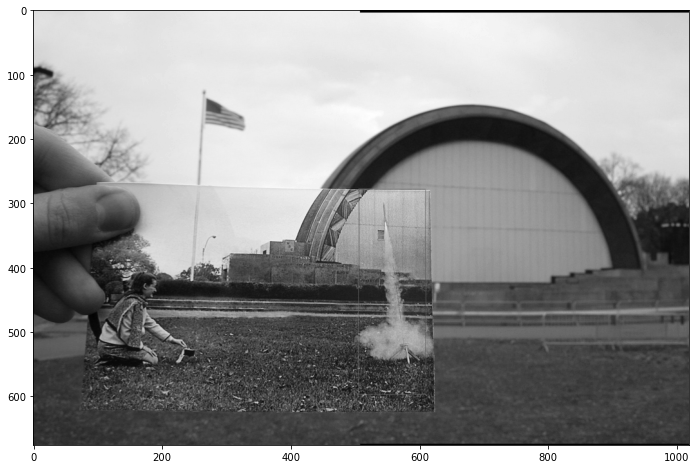

In [15]:
result = warpTwoImages(img2, img1, FinalAffine) ###The final result of the 2 stitched images, stitched with the affine transformation found via RANSAC
plt.figure(figsize = (16,8))
plt.imshow(result,cmap='gray')

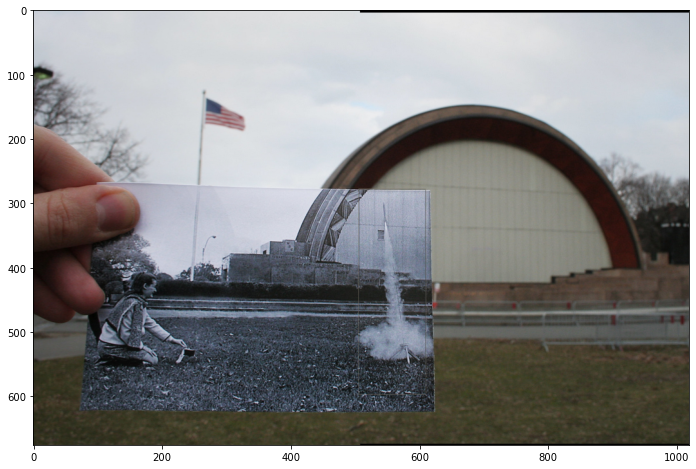

In [16]:
resultcolor = warpTwoImages(img2colorRGB, img1colorRGB, FinalAffine) ###the same result as above, but with color
plt.figure(figsize = (16,8))
plt.imshow(resultcolor)

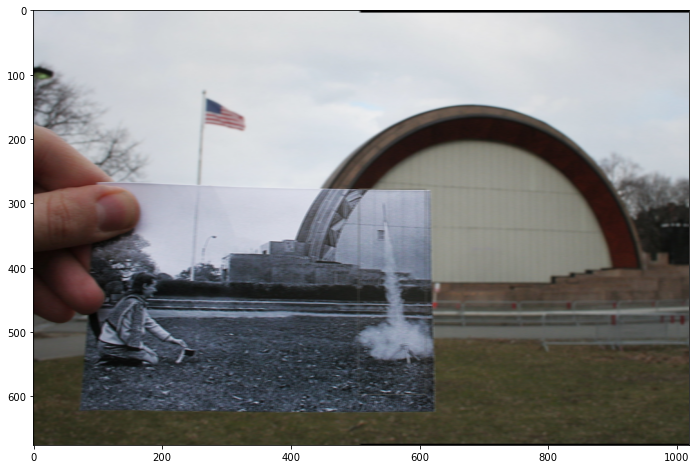

In [17]:
seamless = cv.blur(resultcolor,(5, 1)) ###blurring the result above to remove seams from the stitching, however this reduces the final quality of the image
###the blur kernel is (5,1) because in this example, the seam is along the height of the image. If it was along the width, we would use a (1,5) kernel for example
plt.figure(figsize = (16,8))
plt.imshow(seamless)

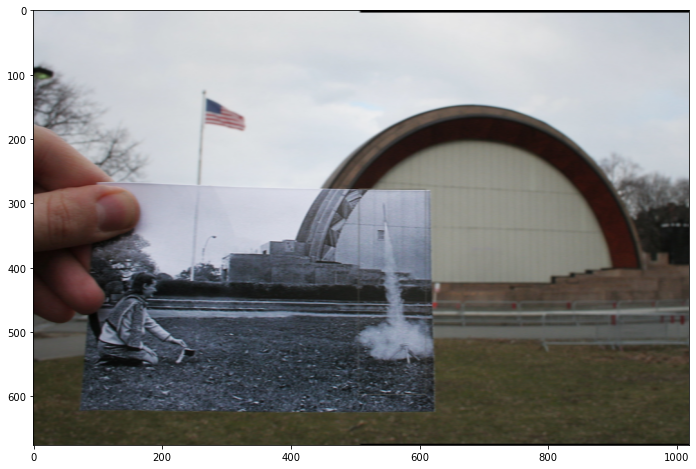

In [18]:
seamlessgauss = cv.GaussianBlur(resultcolor, (7, 1), 0) ###blurring the seams via Gaussian blur
plt.figure(figsize = (16,8))
plt.imshow(seamlessgauss)

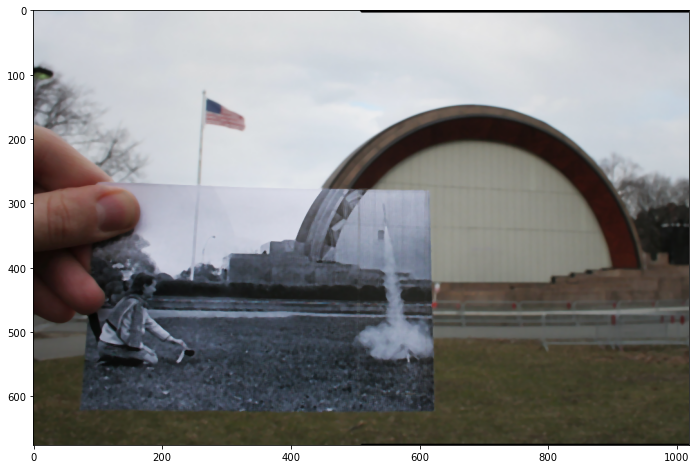

In [19]:
seamlessmedian=cv.medianBlur(resultcolor,5) ###blurring the seams via median blur
plt.figure(figsize = (16,8))
plt.imshow(seamlessmedian)